# Importing Libraries 

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Setting the style for the plots
sns.set(style="whitegrid")

# Web Scraping for car details 

In [2]:
# Initialize the Selenium WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL of the website to scrape
website = 'https://www.cars24.com/buy-used-hyudai-cars-mumbai/' # "Just enter the URL for the car information you want to extract." 
#'https://www.cars24.com/buy-used-hyundai-cars-mumbai/'
#'https://www.cars24.com/buy-used-maruti-cars-mumbai/'
#'https://www.cars24.com/buy-used-tata-cars-mumbai/'
#'https://www.cars24.com/buy-used-toyota-cars-mumbai/'


# Open the website
driver.get(website)

# Scroll down to load more cars
scroll_pause_time = 2  # Adjust the time as necessary
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load the page
    time.sleep(scroll_pause_time)
    
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Parse the loaded content with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Close the Selenium WebDriver
driver.quit()

# Find all <h3> tags with the specified class for car names
car_names = soup.find_all('h3', {'class': '_11dVb'})

# Find all <ul> tags with the specified class for car details
car_details = soup.find_all('ul', {'class': '_3J2G-'})

# Find all <div> tags with the specified class for prices
car_prices = soup.find_all('div', {'class': '_2KyOK'})

# Initialize lists to store car details
car_data = []

for i in range(len(car_names)):
    # Extract car name and make year
    name = car_names[i].get_text()
    
    # Extract make year using regex
    make_year_match = re.search(r'\b(\d{4})\b', name)
    make_year = make_year_match.group(0) if make_year_match else 'N/A'
    
    # Clean the car name by removing the make year
    cleaned_name = re.sub(r'\b\d{4}\b', '', name).strip()

    # Extract the car details
    details = car_details[i].find_all('li')
    km_driven = details[0].get_text() if len(details) > 0 else 'N/A'
    fuel_type = details[2].get_text() if len(details) > 2 else 'N/A'
    transmission_type = details[4].get_text() if len(details) > 4 else 'N/A'

    # Extract the car price
    price = car_prices[i].find('strong', {'class': '_3RL-I'}).get_text() if car_prices[i].find('strong', {'class': '_3RL-I'}) else 'N/A'

    # Append the extracted data to the list
    car_data.append([cleaned_name, km_driven, make_year, fuel_type, transmission_type, price])

# Create a pandas DataFrame
df = pd.DataFrame(car_data, columns=['Car Name', 'Kilometers Driven', 'Year of Manufacture', 'Fuel Type', 'Transmission Type', 'Price'])

# Save the DataFrame to a CSV file
df.to_csv('used_toyota_cars_mumbai_detailed.csv', index=False)

Initialize Selenium WebDriver:

    Selenium WebDriver is set up and configured to use the Chrome browser. This allows for automated interaction with the website.

Open the Target Website:

    The WebDriver navigates to the specified URL of the car listing page.

Automate Scrolling to Load All Content:

    The script repeatedly scrolls down the page to trigger dynamic loading of additional car listings. It waits for a short period after each scroll to ensure new content is loaded.

Parse Loaded Content:

    After all content is loaded, the page source is parsed using BeautifulSoup to extract the relevant HTML elements.

Extract Car Details:

    The script finds and extracts car names, details, and prices from the HTML elements.
    For each car, it extracts:
        Car name and make year.
        Kilometers driven, fuel type, and transmission type from the details list.
        Price from the price tag.

Clean and Structure Data:

    The extracted data is cleaned (e.g., removing the make year from car names) and structured into a list.

Save Data to CSV:

    The structured data is converted into a pandas DataFrame and saved to a CSV file.


Dynamic Content Loading:

    Many modern websites, including car listing sites, use JavaScript to load content dynamically. This means that not all the data is present in the initial HTML source but is loaded as the user scrolls or interacts with the page.

Automating Scrolling:

    Selenium allows the script to simulate user actions such as scrolling down the page. This is essential for loading more car listings which are not visible initially.    

# Huydai_cars

In [3]:
data1= pd.read_csv('used_hyundai_cars_mumbai_detailed.csv')

In [4]:
data1

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Hyundai Creta SX PLUS AT 1.6 PETROL,"83,626 km",2016,Petrol,Automatic,₹8.54 Lakh
1,Hyundai NEW SANTRO SPORTZ CNG,"73,743 km",2019,CNG,Manual,₹4.77 Lakh
2,Hyundai Verna 1.6 VTVT SX,"24,675 km",2018,Petrol,Manual,₹7.21 Lakh
3,Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT,"59,893 km",2016,Petrol,Manual,₹3.72 Lakh
4,Hyundai VENUE SX PLUS 1.0 TURBO DCT,"43,419 km",2019,Petrol,Automatic,₹9.18 Lakh
...,...,...,...,...,...,...
171,Hyundai i10 SPORTZ 1.2,"69,847 km",2012,Petrol,Manual,₹2.27 Lakh
172,Hyundai New Elantra 2.0 SX(O) AT PETROL,"76,064 km",2017,Petrol,Automatic,₹8.06 Lakh
173,Hyundai i10 MAGNA 1.1,"55,760 km",2015,Petrol,Manual,₹2.94 Lakh
174,Hyundai Grand i10 ASTA 1.2 KAPPA VTVT,"35,272 km",2014,Petrol,Manual,₹3.86 Lakh


In [5]:
data1.dtypes

Car Name               object
Kilometers Driven      object
Year of Manufacture     int64
Fuel Type              object
Transmission Type      object
Price                  object
dtype: object

In [6]:
# Convert 'Kilometers Driven' to integer
data1['Kilometers Driven'] = data1['Kilometers Driven'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if pd.notnull(x) else None)

# Convert 'Price' to float and rename the column to 'Price (in Lakhs)'
data1['Price (in Lakhs)'] = data1['Price'].apply(lambda x: float(re.sub(r'[₹,Lakh ]', '', x)) if pd.notnull(x) else None)

# Drop the original 'Price' column
data1.drop(columns=['Price'], inplace=True)

In [7]:
data1.dtypes

Car Name                object
Kilometers Driven        int64
Year of Manufacture      int64
Fuel Type               object
Transmission Type       object
Price (in Lakhs)       float64
dtype: object

In [8]:
data1

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Hyundai Creta SX PLUS AT 1.6 PETROL,83626,2016,Petrol,Automatic,8.54
1,Hyundai NEW SANTRO SPORTZ CNG,73743,2019,CNG,Manual,4.77
2,Hyundai Verna 1.6 VTVT SX,24675,2018,Petrol,Manual,7.21
3,Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT,59893,2016,Petrol,Manual,3.72
4,Hyundai VENUE SX PLUS 1.0 TURBO DCT,43419,2019,Petrol,Automatic,9.18
...,...,...,...,...,...,...
171,Hyundai i10 SPORTZ 1.2,69847,2012,Petrol,Manual,2.27
172,Hyundai New Elantra 2.0 SX(O) AT PETROL,76064,2017,Petrol,Automatic,8.06
173,Hyundai i10 MAGNA 1.1,55760,2015,Petrol,Manual,2.94
174,Hyundai Grand i10 ASTA 1.2 KAPPA VTVT,35272,2014,Petrol,Manual,3.86


In [9]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers Driven,176.0,51557.204545,26080.911180,2358.00,32675.2500,49877.5,69925.00,122248.00
Year of Manufacture,176.0,2016.795455,2.671154,2011.00,2015.0000,2017.0,2019.00,2023.00
Price (in Lakhs),176.0,5.854830,2.394041,1.94,4.1075,5.2,7.64,14.46


# Maruti_cars

In [10]:
data2= pd.read_csv('used_maruti_cars_mumbai_detailed.csv')

In [11]:
data2

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Maruti Swift Dzire ZDI,"11,144 km",2014,Diesel,Manual,₹6.13 Lakh
1,Maruti Swift VXI,"13,167 km",2019,Petrol,Manual,₹5.67 Lakh
2,Maruti S PRESSO VXI+,"51,291 km",2019,Petrol,Manual,₹3.90 Lakh
3,Maruti Baleno DELTA PETROL 1.2,"43,273 km",2016,Petrol,Manual,₹5.05 Lakh
4,Maruti Swift ZXI,"42,338 km",2013,Petrol,Manual,₹3.41 Lakh
...,...,...,...,...,...,...
196,Maruti Baleno DELTA PETROL 1.2,"9,508 km",2016,Petrol,Manual,₹5.07 Lakh
197,Maruti Wagon R 1.0 LXI,"21,606 km",2013,Petrol,Manual,₹2.68 Lakh
198,Maruti Wagon R 1.0 LXI CNG,"30,014 km",2015,CNG,Manual,₹3.54 Lakh
199,Maruti New Wagon-R VXI 1.2,"11,829 km",2019,Petrol,Manual,₹4.67 Lakh


In [12]:
data2.dtypes

Car Name               object
Kilometers Driven      object
Year of Manufacture     int64
Fuel Type              object
Transmission Type      object
Price                  object
dtype: object

In [13]:
# Convert 'Kilometers Driven' to integer
data2['Kilometers Driven'] = data2['Kilometers Driven'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if pd.notnull(x) else None)

# Convert 'Price' to float and rename the column to 'Price (in Lakhs)'
data2['Price (in Lakhs)'] = data2['Price'].apply(lambda x: float(re.sub(r'[₹,Lakh ]', '', x)) if pd.notnull(x) else None)

# Drop the original 'Price' column
data2.drop(columns=['Price'], inplace=True)

In [14]:
data2.dtypes

Car Name                object
Kilometers Driven        int64
Year of Manufacture      int64
Fuel Type               object
Transmission Type       object
Price (in Lakhs)       float64
dtype: object

In [15]:
data2

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Maruti Swift Dzire ZDI,11144,2014,Diesel,Manual,6.13
1,Maruti Swift VXI,13167,2019,Petrol,Manual,5.67
2,Maruti S PRESSO VXI+,51291,2019,Petrol,Manual,3.90
3,Maruti Baleno DELTA PETROL 1.2,43273,2016,Petrol,Manual,5.05
4,Maruti Swift ZXI,42338,2013,Petrol,Manual,3.41
...,...,...,...,...,...,...
196,Maruti Baleno DELTA PETROL 1.2,9508,2016,Petrol,Manual,5.07
197,Maruti Wagon R 1.0 LXI,21606,2013,Petrol,Manual,2.68
198,Maruti Wagon R 1.0 LXI CNG,30014,2015,CNG,Manual,3.54
199,Maruti New Wagon-R VXI 1.2,11829,2019,Petrol,Manual,4.67


In [16]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers Driven,201.0,45890.761194,25860.640441,1958.00,26866.00,42234.00,62850.00,120050.00
Year of Manufacture,201.0,2017.194030,2.899511,2011.00,2015.00,2017.00,2020.00,2023.00
Price (in Lakhs),201.0,5.000448,1.991625,1.92,3.65,4.74,5.81,12.31


# Tata_cars

In [17]:
data3= pd.read_csv('used_tata_cars_mumbai_detailed.csv')

In [18]:
data3

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Tata Tiago XZA PLUS PETROL,"6,375 km",2020,Petrol,Automatic,₹6.08 Lakh
1,Tata Tiago XE PETROL,"10,232 km",2021,Petrol,Manual,₹5.44 Lakh
2,Tata NEXON XZA PLUS (O) PETROL,"26,213 km",2021,Petrol,Automatic,₹10.36 Lakh
3,Tata NEXON XZA PLUS SUNROOF DIESEL,"75,525 km",2020,Diesel,Automatic,₹9.86 Lakh
4,Tata TIGOR XZ PETROL,"94,586 km",2018,Petrol,Manual,₹4.08 Lakh
5,Tata Harrier XZ 2.0L,"52,045 km",2019,Diesel,Manual,₹12.68 Lakh
6,Tata NEXON XZA PLUS DIESEL DUAL TONE,"1,04,792 km",2018,Diesel,Automatic,₹6.68 Lakh
7,Tata Harrier XZA PLUS 2.0L DARK EDITION,"31,539 km",2021,Diesel,Automatic,₹18.69 Lakh
8,Tata TIGOR XE PETROL,"52,153 km",2021,Petrol,Manual,₹5.17 Lakh
9,Tata Tiago XZ PETROL,"76,127 km",2018,Petrol,Manual,₹4.11 Lakh


In [19]:
data3.dtypes

Car Name               object
Kilometers Driven      object
Year of Manufacture     int64
Fuel Type              object
Transmission Type      object
Price                  object
dtype: object

In [20]:
# Convert 'Kilometers Driven' to integer
data3['Kilometers Driven'] = data3['Kilometers Driven'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if pd.notnull(x) else None)

# Convert 'Price' to float and rename the column to 'Price (in Lakhs)'
data3['Price (in Lakhs)'] = data3['Price'].apply(lambda x: float(re.sub(r'[₹,Lakh ]', '', x)) if pd.notnull(x) else None)

# Drop the original 'Price' column
data3.drop(columns=['Price'], inplace=True)

In [21]:
data3

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Tata Tiago XZA PLUS PETROL,6375,2020,Petrol,Automatic,6.08
1,Tata Tiago XE PETROL,10232,2021,Petrol,Manual,5.44
2,Tata NEXON XZA PLUS (O) PETROL,26213,2021,Petrol,Automatic,10.36
3,Tata NEXON XZA PLUS SUNROOF DIESEL,75525,2020,Diesel,Automatic,9.86
4,Tata TIGOR XZ PETROL,94586,2018,Petrol,Manual,4.08
5,Tata Harrier XZ 2.0L,52045,2019,Diesel,Manual,12.68
6,Tata NEXON XZA PLUS DIESEL DUAL TONE,104792,2018,Diesel,Automatic,6.68
7,Tata Harrier XZA PLUS 2.0L DARK EDITION,31539,2021,Diesel,Automatic,18.69
8,Tata TIGOR XE PETROL,52153,2021,Petrol,Manual,5.17
9,Tata Tiago XZ PETROL,76127,2018,Petrol,Manual,4.11


In [22]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers Driven,45.0,35235.844444,25634.028733,2973.0,16603.00,31539.00,48213.00,104792.00
Year of Manufacture,45.0,2020.400000,1.513575,2017.0,2019.00,2021.00,2022.00,2023.00
Price (in Lakhs),45.0,8.339778,3.546259,3.9,6.54,7.73,8.68,19.85


# Toyota_cars

In [23]:
data4= pd.read_csv('used_toyota_cars_mumbai_detailed.csv')

In [24]:
data4

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price
0,Toyota YARIS VX MT,"30,509 km",2018,Petrol,Manual,₹7.83 Lakh
1,Toyota URBAN CRUISER MID GRADE MT,"39,069 km",2021,Petrol,Manual,₹8.26 Lakh
2,Toyota Etios Liva G,"79,645 km",2011,Petrol,Manual,₹2.28 Lakh
3,Toyota Etios Liva G,"75,420 km",2011,Petrol,Manual,₹2.44 Lakh
4,Toyota Glanza V CVT,"57,023 km",2020,Petrol,Automatic,₹6.83 Lakh
5,Toyota Etios Liva G,"77,595 km",2011,Petrol,Manual,₹2.37 Lakh
6,Toyota Corolla Altis VL CVT PETROL,"77,581 km",2018,Petrol,Automatic,₹9.80 Lakh
7,Toyota Glanza G CVT,"21,695 km",2019,Petrol,Automatic,₹6.77 Lakh
8,Toyota URBAN CRUISER HIGH GRADE AT,"45,799 km",2021,Petrol,Automatic,₹9.64 Lakh
9,Toyota Corolla Altis VL CVT PETROL,"74,502 km",2018,Petrol,Automatic,₹9.58 Lakh


In [25]:
data4.dtypes

Car Name               object
Kilometers Driven      object
Year of Manufacture     int64
Fuel Type              object
Transmission Type      object
Price                  object
dtype: object

In [26]:
# Convert 'Kilometers Driven' to integer
data4['Kilometers Driven'] = data4['Kilometers Driven'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if pd.notnull(x) else None)

# Convert 'Price' to float and rename the column to 'Price (in Lakhs)'
data4['Price (in Lakhs)'] = data4['Price'].apply(lambda x: float(re.sub(r'[₹,Lakh ]', '', x)) if pd.notnull(x) else None)

# Drop the original 'Price' column
data4.drop(columns=['Price'], inplace=True)

In [27]:
data4

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Toyota YARIS VX MT,30509,2018,Petrol,Manual,7.83
1,Toyota URBAN CRUISER MID GRADE MT,39069,2021,Petrol,Manual,8.26
2,Toyota Etios Liva G,79645,2011,Petrol,Manual,2.28
3,Toyota Etios Liva G,75420,2011,Petrol,Manual,2.44
4,Toyota Glanza V CVT,57023,2020,Petrol,Automatic,6.83
5,Toyota Etios Liva G,77595,2011,Petrol,Manual,2.37
6,Toyota Corolla Altis VL CVT PETROL,77581,2018,Petrol,Automatic,9.80
7,Toyota Glanza G CVT,21695,2019,Petrol,Automatic,6.77
8,Toyota URBAN CRUISER HIGH GRADE AT,45799,2021,Petrol,Automatic,9.64
9,Toyota Corolla Altis VL CVT PETROL,74502,2018,Petrol,Automatic,9.58


In [28]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers Driven,18.0,44504.111111,26011.511485,5052.00,18924.500,42434.000,71256.50,79645.00
Year of Manufacture,18.0,2018.166667,3.682231,2011.00,2017.250,2019.000,2021.00,2022.00
Price (in Lakhs),18.0,7.596111,2.784485,2.28,6.785,8.045,9.76,11.06


In [29]:
# Load all datasets
hyundai_data = data1
maruti_data = data2
tata_data = data3
toyota_data = data4

# Concatenate DataFrames
All_data = pd.concat([hyundai_data, maruti_data, tata_data,toyota_data], ignore_index=True)

In [30]:
All_data

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Hyundai Creta SX PLUS AT 1.6 PETROL,83626,2016,Petrol,Automatic,8.54
1,Hyundai NEW SANTRO SPORTZ CNG,73743,2019,CNG,Manual,4.77
2,Hyundai Verna 1.6 VTVT SX,24675,2018,Petrol,Manual,7.21
3,Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT,59893,2016,Petrol,Manual,3.72
4,Hyundai VENUE SX PLUS 1.0 TURBO DCT,43419,2019,Petrol,Automatic,9.18
...,...,...,...,...,...,...
435,Toyota URBAN CRUISER PREMIUM GRADE AT,13896,2022,Petrol,Automatic,11.06
436,Toyota Glanza V CVT,15816,2019,Petrol,Automatic,7.37
437,Toyota Corolla Altis VL CVT PETROL,61520,2017,Petrol,Automatic,10.21
438,Toyota Glanza G,5052,2022,Petrol,Manual,7.31


# Statistical Analysis

In [31]:
All_data.to_excel('Cars24_data.xlsx', index=False)

In [32]:
df = pd.read_excel('Cars24_data.xlsx')

In [33]:
df.head()

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
0,Hyundai Creta SX PLUS AT 1.6 PETROL,83626,2016,Petrol,Automatic,8.54
1,Hyundai NEW SANTRO SPORTZ CNG,73743,2019,CNG,Manual,4.77
2,Hyundai Verna 1.6 VTVT SX,24675,2018,Petrol,Manual,7.21
3,Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT,59893,2016,Petrol,Manual,3.72
4,Hyundai VENUE SX PLUS 1.0 TURBO DCT,43419,2019,Petrol,Automatic,9.18


In [34]:
df.tail()

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price (in Lakhs)
435,Toyota URBAN CRUISER PREMIUM GRADE AT,13896,2022,Petrol,Automatic,11.06
436,Toyota Glanza V CVT,15816,2019,Petrol,Automatic,7.37
437,Toyota Corolla Altis VL CVT PETROL,61520,2017,Petrol,Automatic,10.21
438,Toyota Glanza G,5052,2022,Petrol,Manual,7.31
439,Toyota URBAN CRUISER PREMIUM GRADE MT,18001,2021,Petrol,Manual,8.95


In [35]:
df.dtypes

Car Name                object
Kilometers Driven        int64
Year of Manufacture      int64
Fuel Type               object
Transmission Type       object
Price (in Lakhs)       float64
dtype: object

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers Driven,440.0,47010.904545,26291.214786,1958.00,26621.25,44178.00,64118.2500,122248.00
Year of Manufacture,440.0,2017.402273,2.922615,2011.00,2015.00,2017.00,2020.0000,2023.00
Price (in Lakhs),440.0,5.789909,2.596118,1.92,3.90,5.21,7.2625,19.85


In [37]:
df.isnull().sum()

Car Name               0
Kilometers Driven      0
Year of Manufacture    0
Fuel Type              0
Transmission Type      0
Price (in Lakhs)       0
dtype: int64

# Data Visualization and insights on total number of cars 

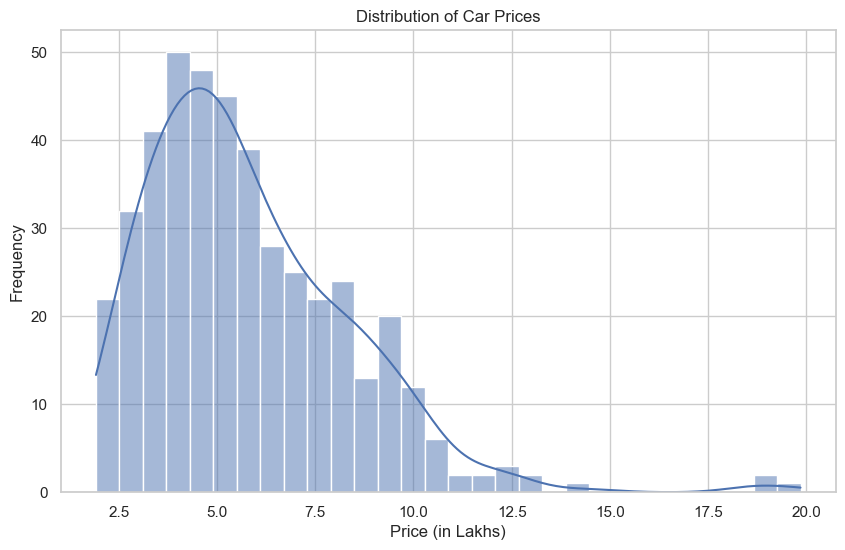

In [38]:
# 1. Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (in Lakhs)'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

**The histogram shows the distribution of car prices across all brands. The distribution appears to be right-skewed, with most cars priced between 2-8 lakhs. There's a long tail extending towards higher prices, indicating some luxury or high-end models. The peak of the distribution is around 4-6 lakhs, suggesting this is the most common price range for used cars in this dataset.**

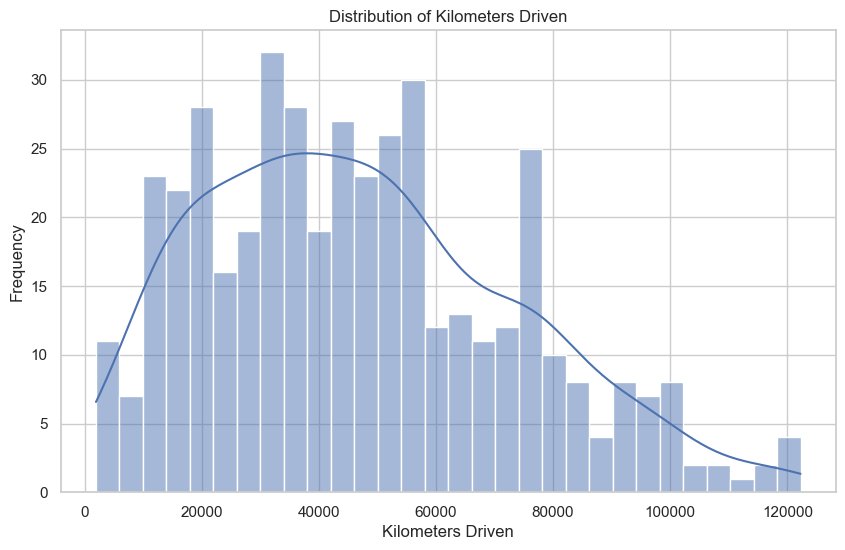

In [39]:
# 2.Plot the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers Driven'], kde=True, bins=30)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()


**This histogram displays a right-skewed distribution of kilometers driven. Most cars have been driven between 20,000 to 80,000 kilometers. There's a long tail extending to the right, representing cars with very high mileage. The peak is around 40,000-60,000 km, suggesting this is the most common mileage range for used cars in the dataset.**

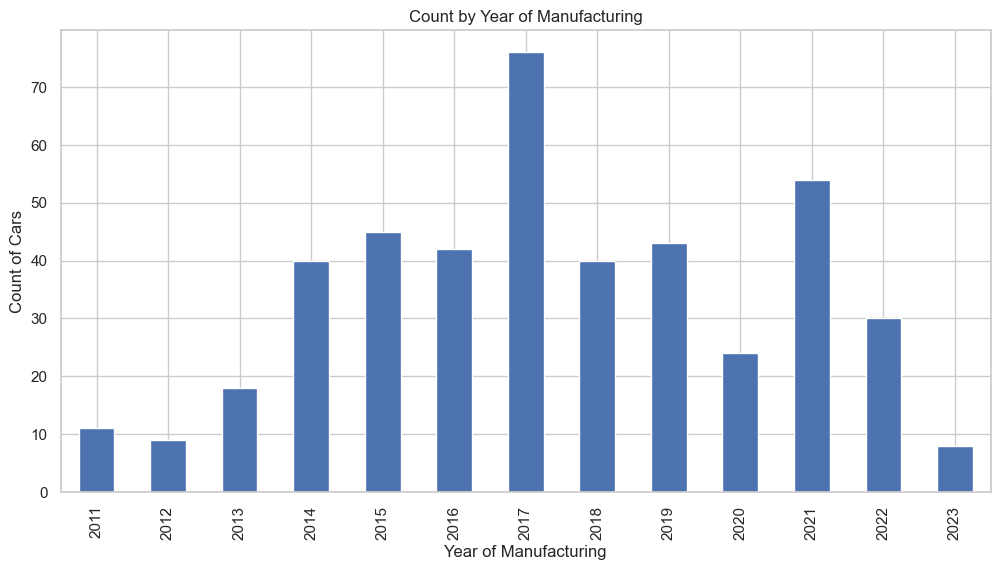

In [40]:
avg_count_by_years = df.groupby('Year of Manufacture')['Price (in Lakhs)'].count()
# print(avg_count_by_years)

# 3. Plot average price by year of manufacturing
plt.figure(figsize=(12, 6))
avg_count_by_years.plot(kind='bar')
# avg_count_by_years.plot(kind='line', marker='o')
plt.title('Count by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Count of Cars')
# plt.xticks(rotation=45)
plt.show()

**This bar chart shows the number of cars available for each manufacturing year. There's a clear trend of more recent cars being more numerous in the dataset. The count increases sharply from 2015 onwards, with the highest number of cars from 2019-2022. This could indicate a preference for newer used cars in the market or reflect the inventory available on Cars24.**

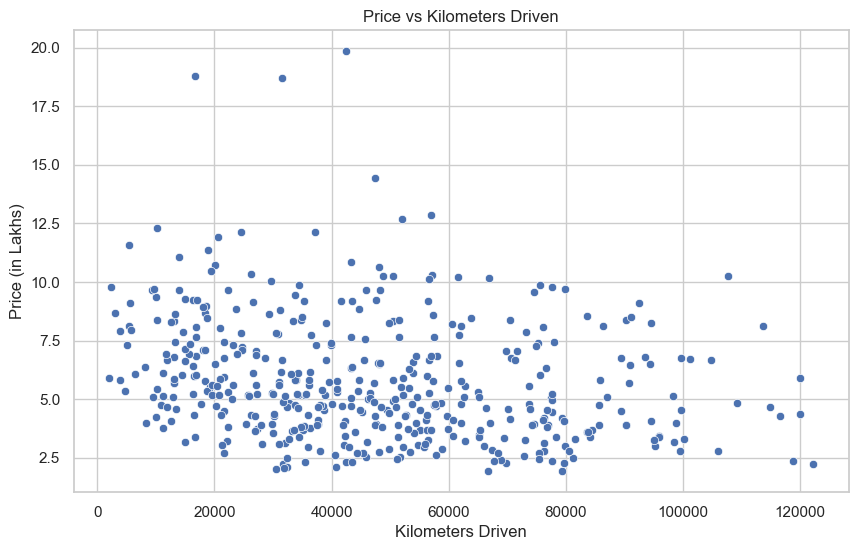

In [41]:
# 4. Plot the relationship between price and kilometers driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers Driven', y='Price (in Lakhs)', data=df)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in Lakhs)')
plt.show()


**This scatter plot reveals a negative correlation between price and kilometers driven. As expected, cars with higher mileage tend to be priced lower. However, there's significant scatter, indicating other factors (like brand, model, condition) also influence price. Some high-mileage cars still command higher prices, possibly luxury models or cars in excellent condition.**

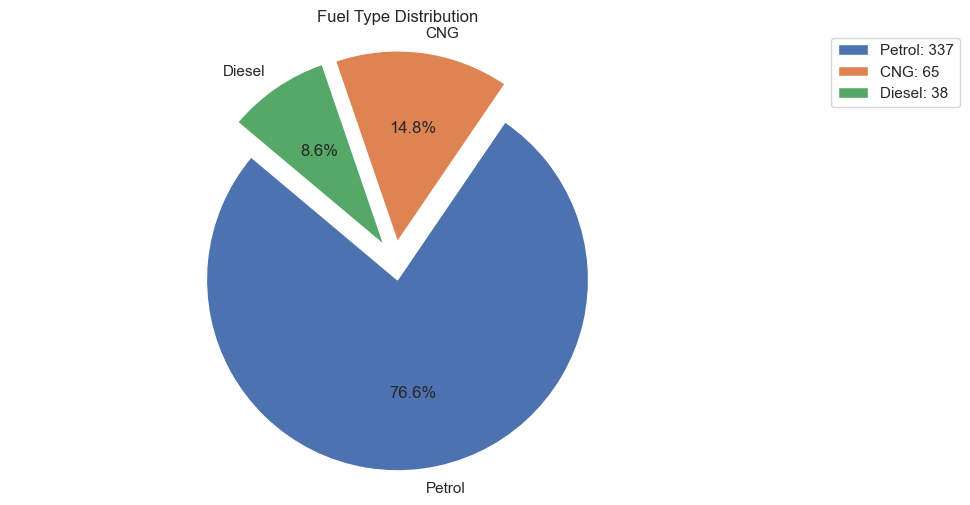

In [42]:
# 5. Fuel Type Distribution - Pie Chart
plt.figure(figsize=(10, 6))
fuel_counts = df['Fuel Type'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, explode=[0.1]*len(fuel_counts))
plt.title('Fuel Type Distribution')
plt.legend([f'{fuel}: {count}' for fuel, count in zip(fuel_counts.index, fuel_counts)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()


**The pie chart shows that petrol cars dominate the market, making up about 76.6% of the cars. Diesel cars are the second most common at around 14.8%. CNG and other fuel types make up a small portion of the market. This distribution likely reflects the general preference for petrol cars in India, especially in urban areas.**

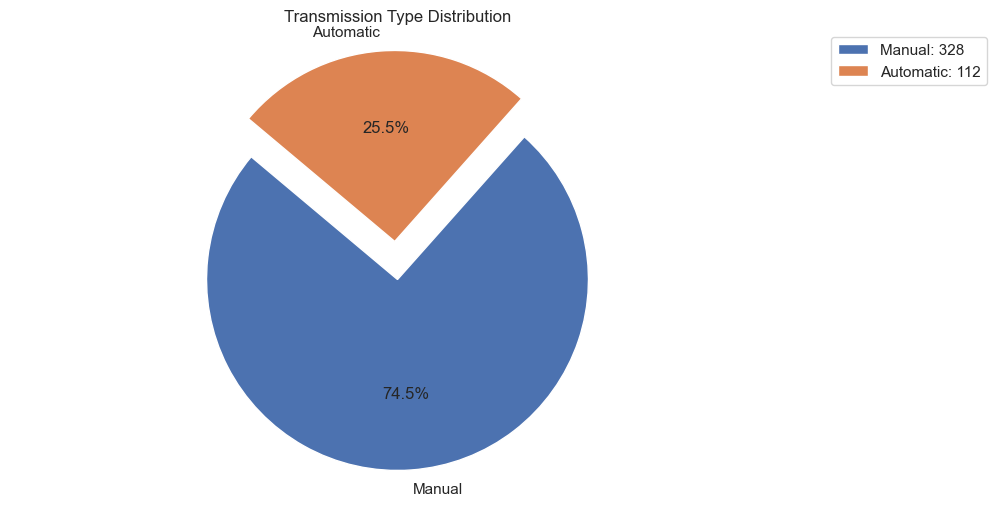

In [43]:
# 6. Transmission Type Distribution - Pie Chart
plt.figure(figsize=(10, 6))
transmission_counts = df['Transmission Type'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, explode=[0.1]*len(transmission_counts))
plt.title('Transmission Type Distribution')
plt.legend([f'{trans}: {count}' for trans, count in zip(transmission_counts.index, transmission_counts)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()

**Manual transmission cars are clearly more common, making up about 75% of the cars. Automatic transmission cars account for the remaining 25%. This reflects the Indian market's preference for manual cars, which are generally cheaper and more fuel-efficient.**

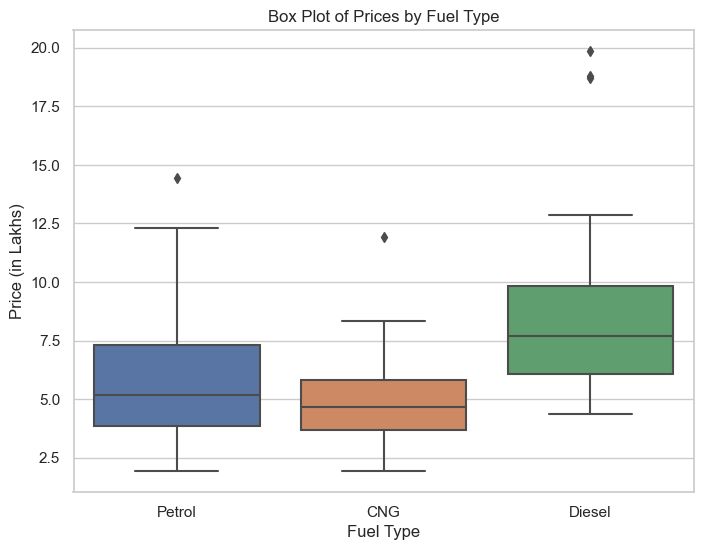

In [44]:
# 7. Box Plot of Prices by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='Price (in Lakhs)', data=df)
plt.title('Box Plot of Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakhs)')
plt.show()

**Diesel cars show the highest median price and the largest price range. Petrol cars have a lower median price but still a wide range. CNG cars have the lowest median price and the smallest range. This could be due to diesel cars often being larger, more powerful vehicles, while CNG is often chosen for its economy.**

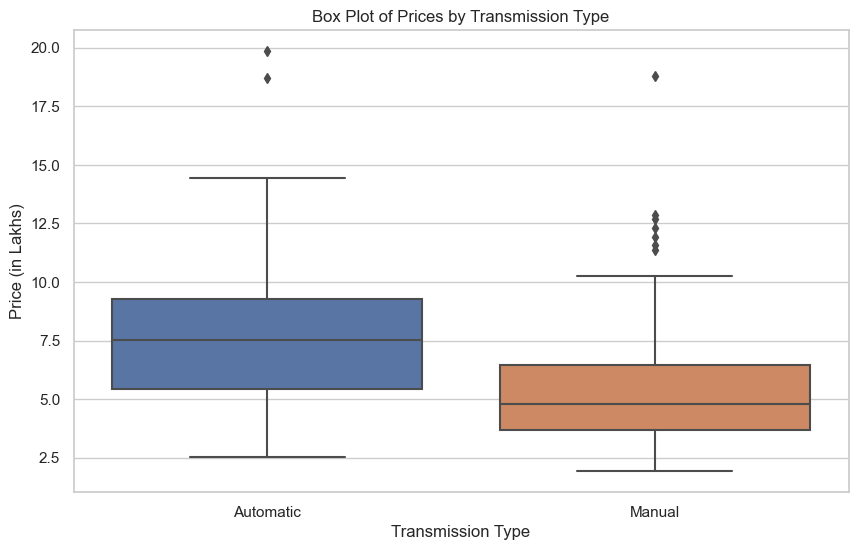

In [45]:
# 8. Box Plot of Prices by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission Type', y='Price (in Lakhs)', data=df)
plt.title('Box Plot of Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (in Lakhs)')
plt.show()


**Automatic cars have a higher median price and a larger price range compared to manual cars. This is expected as automatic transmission is often a feature of more expensive, higher-end models.**

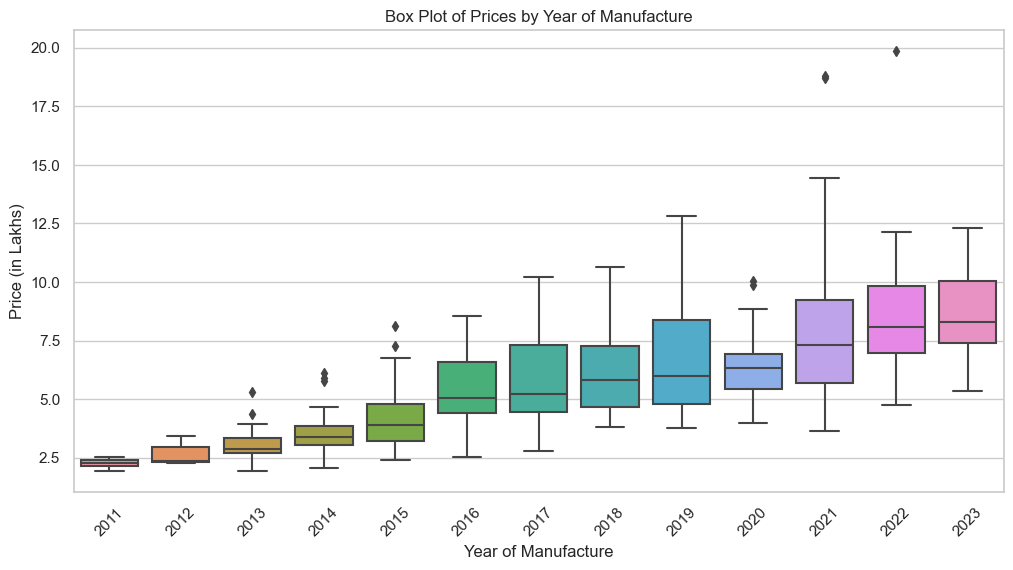

In [46]:
# 9. Box Plot of Prices by Year of Manufacture
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year of Manufacture', y='Price (in Lakhs)', data=df)
plt.title('Box Plot of Prices by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()


**There's a clear trend of increasing prices for newer cars. The median price and price range both increase for more recent manufacturing years. This reflects the expected depreciation of cars over time.**

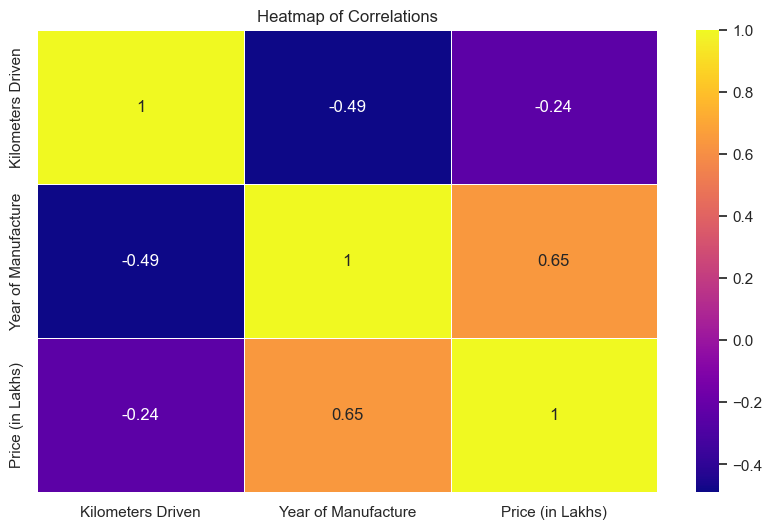

In [47]:
#  10. Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

**The heatmap shows strong positive correlation between 'Year of Manufacture' and 'Price', confirming that newer cars tend to be more expensive. There's a negative correlation between 'Kilometers Driven' and both 'Price' and 'Year of Manufacture', indicating that older cars and cheaper cars tend to have higher mileage.**

# Data Visualization and insights on brands of cars

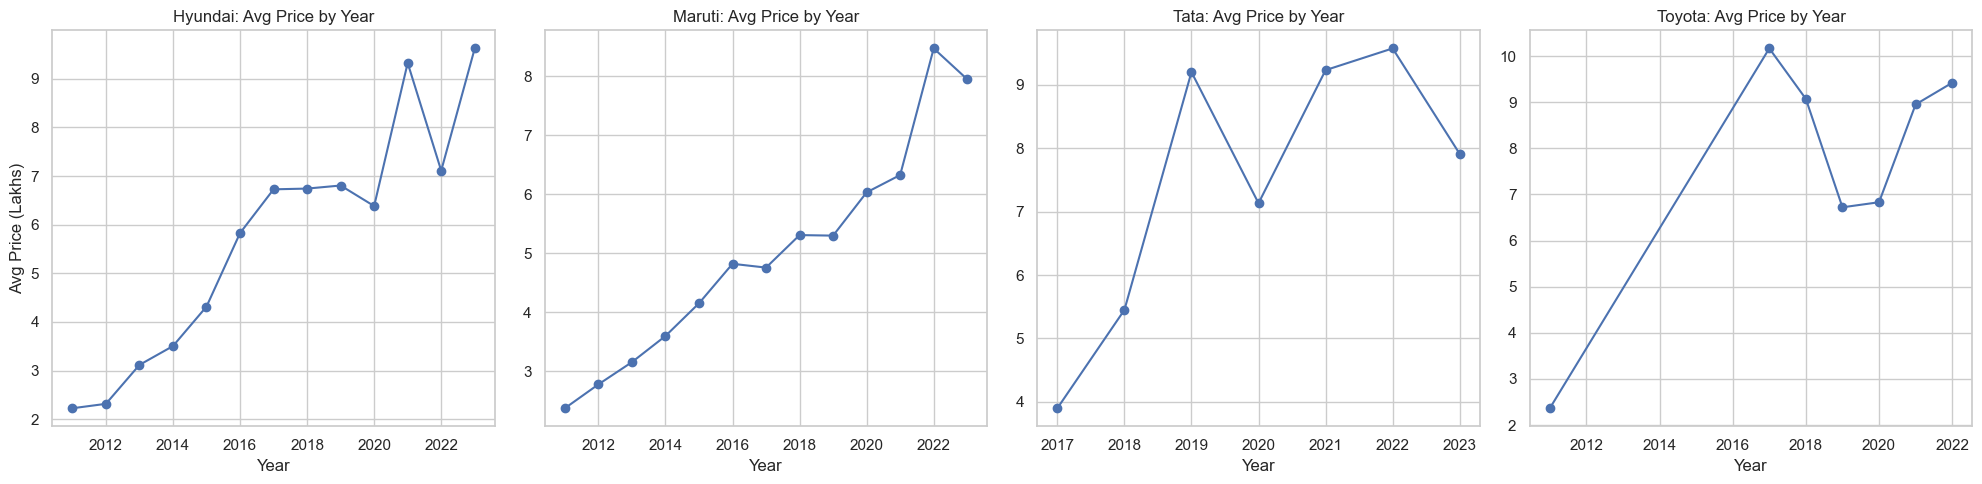

In [54]:
#1. Average Price by Year for each brand

plt.figure(figsize=(20, 5))

plt.subplot(141)
df[df['Car Name'].str.contains('Hyundai')].groupby('Year of Manufacture')['Price (in Lakhs)'].mean().plot(kind='line', marker='o')
plt.title('Hyundai: Avg Price by Year')
plt.xlabel('Year')
plt.ylabel('Avg Price (Lakhs)')

plt.subplot(142)
df[df['Car Name'].str.contains('Maruti')].groupby('Year of Manufacture')['Price (in Lakhs)'].mean().plot(kind='line', marker='o')
plt.title('Maruti: Avg Price by Year')
plt.xlabel('Year')

plt.subplot(143)
df[df['Car Name'].str.contains('Tata')].groupby('Year of Manufacture')['Price (in Lakhs)'].mean().plot(kind='line', marker='o')
plt.title('Tata: Avg Price by Year')
plt.xlabel('Year')

plt.subplot(144)
df[df['Car Name'].str.contains('Toyota')].groupby('Year of Manufacture')['Price (in Lakhs)'].mean().plot(kind='line', marker='o')
plt.title('Toyota: Avg Price by Year')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

**Hyundai and Maruti show a steady increase in average price over the years.**

**Tata shows a more dramatic increase in recent years, possibly due to the introduction of popular models.**

**Toyota maintains higher average prices across all years compared to other brands.**

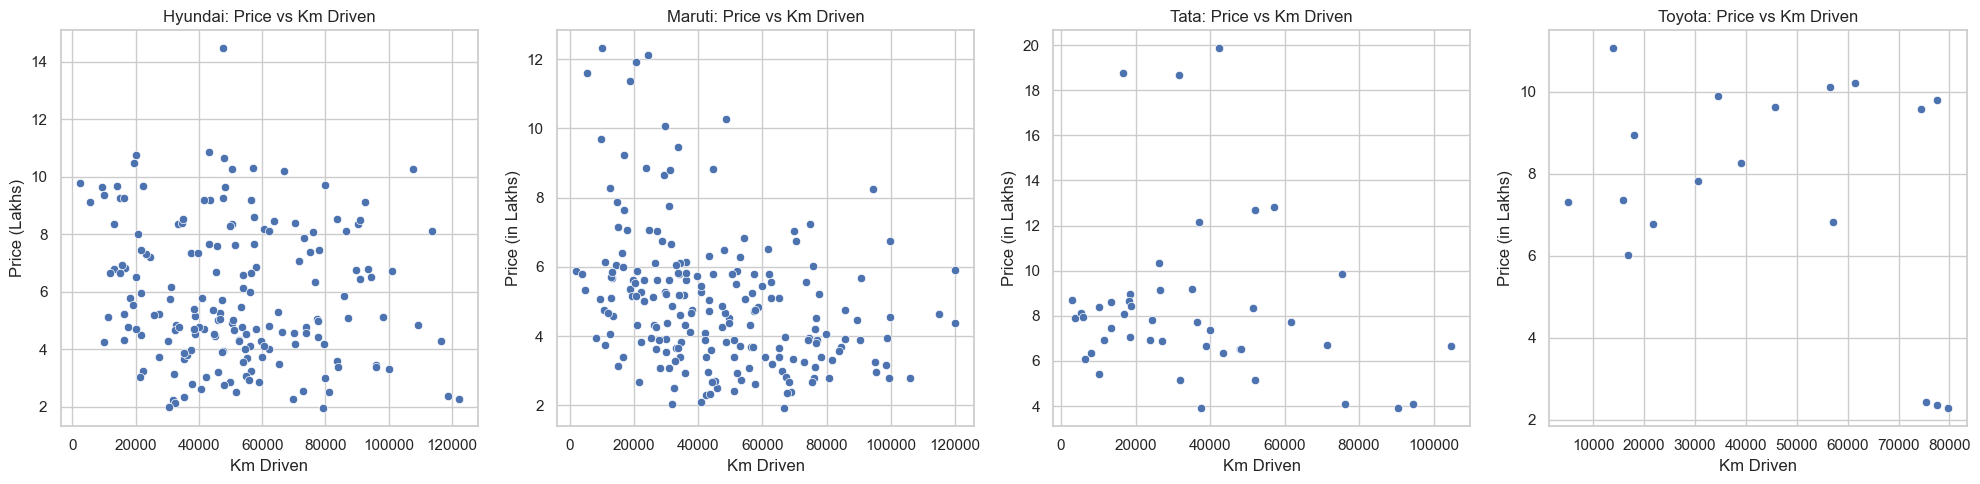

In [49]:
# 2. Price vs Kilometers Driven for each brand

plt.figure(figsize=(20, 5))

plt.subplot(141)
sns.scatterplot(x='Kilometers Driven', y='Price (in Lakhs)', data=df[df['Car Name'].str.contains('Hyundai')])
plt.title('Hyundai: Price vs Km Driven')
plt.xlabel('Km Driven')
plt.ylabel('Price (Lakhs)')

plt.subplot(142)
sns.scatterplot(x='Kilometers Driven', y='Price (in Lakhs)', data=df[df['Car Name'].str.contains('Maruti')])
plt.title('Maruti: Price vs Km Driven')
plt.xlabel('Km Driven')

plt.subplot(143)
sns.scatterplot(x='Kilometers Driven', y='Price (in Lakhs)', data=df[df['Car Name'].str.contains('Tata')])
plt.title('Tata: Price vs Km Driven')
plt.xlabel('Km Driven')

plt.subplot(144)
sns.scatterplot(x='Kilometers Driven', y='Price (in Lakhs)', data=df[df['Car Name'].str.contains('Toyota')])
plt.title('Toyota: Price vs Km Driven')
plt.xlabel('Km Driven')

plt.tight_layout()
plt.show()

**All brands show the expected negative correlation between price and kilometers driven.**
    
**Toyota cars maintain higher prices even at higher mileages compared to other brands.**
    
**Tata shows a wide spread of prices, especially for lower mileage cars.**

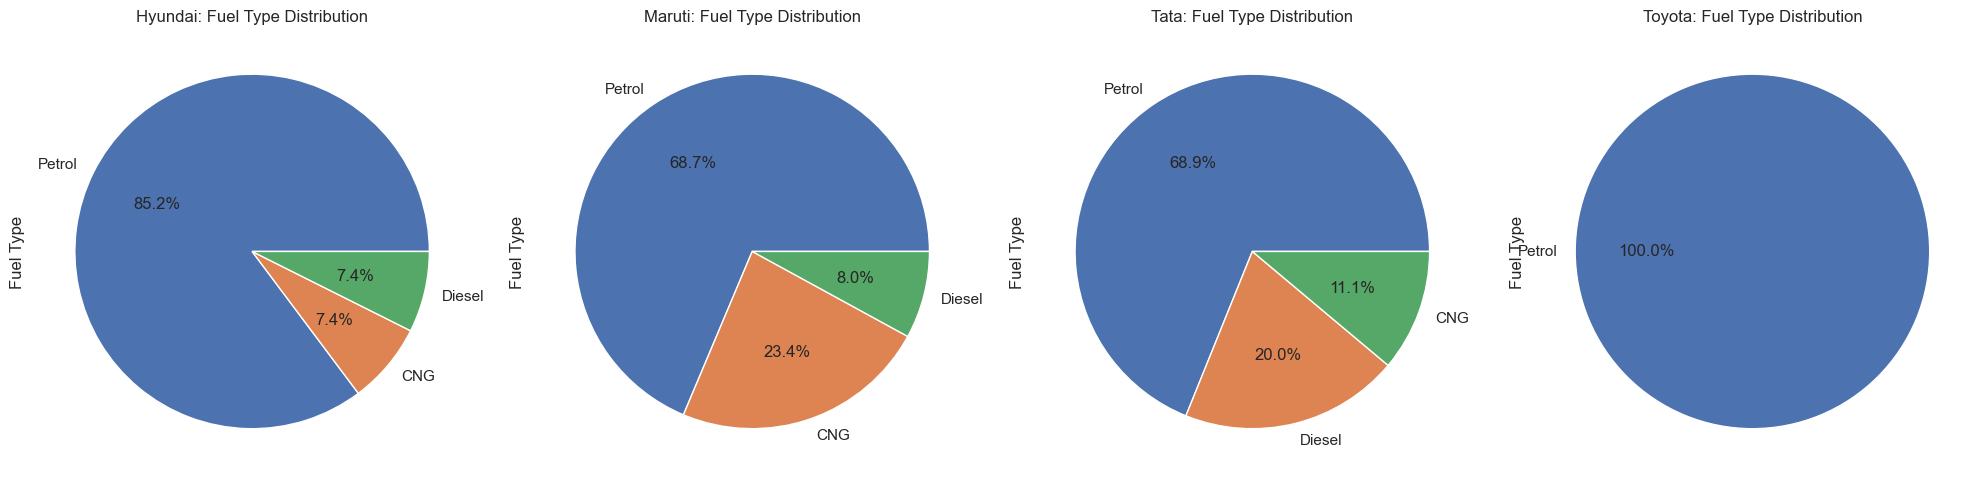

In [50]:
# 3. Fuel Type Distribution for each brand

plt.figure(figsize=(20, 5))

plt.subplot(141)
df[df['Car Name'].str.contains('Hyundai')]['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Hyundai: Fuel Type Distribution')

plt.subplot(142)
df[df['Car Name'].str.contains('Maruti')]['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Maruti: Fuel Type Distribution')

plt.subplot(143)
df[df['Car Name'].str.contains('Tata')]['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tata: Fuel Type Distribution')

plt.subplot(144)
df[df['Car Name'].str.contains('Toyota')]['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Toyota: Fuel Type Distribution')

plt.tight_layout()
plt.show()

**Hyundai and Maruti offer a mix of fuel types, with petrol being dominant.**

**Tata has a higher proportion of diesel cars compared to other brands.**
    
**Toyota's distribution is heavily skewed towards petrol cars.**

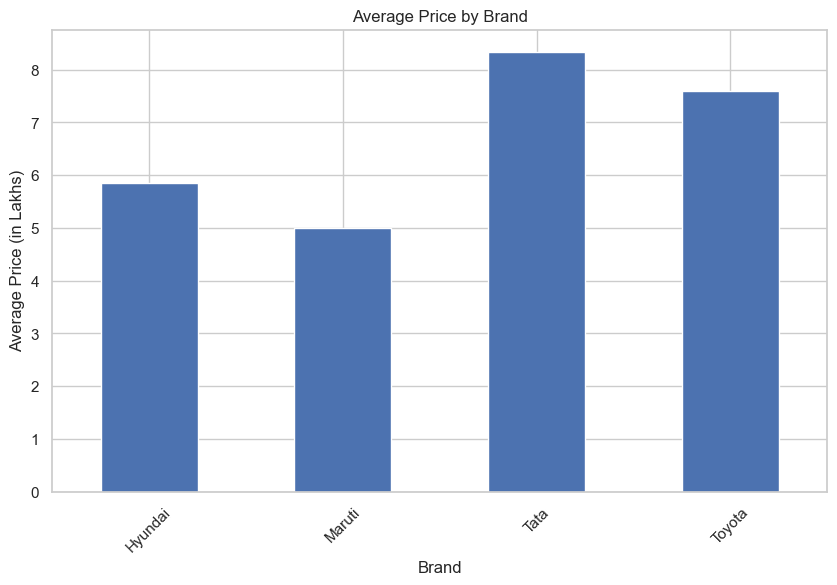

In [51]:
# 4. Comparing average prices across brands

plt.figure(figsize=(10, 6))
df.groupby(df['Car Name'].str.split().str[0])['Price (in Lakhs)'].mean().plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

**Toyota has the highest average price, followed by Tata, then Hyundai, and finally Maruti. This could reflect the positioning of these brands in the market, with Toyota being perceived as more premium.**

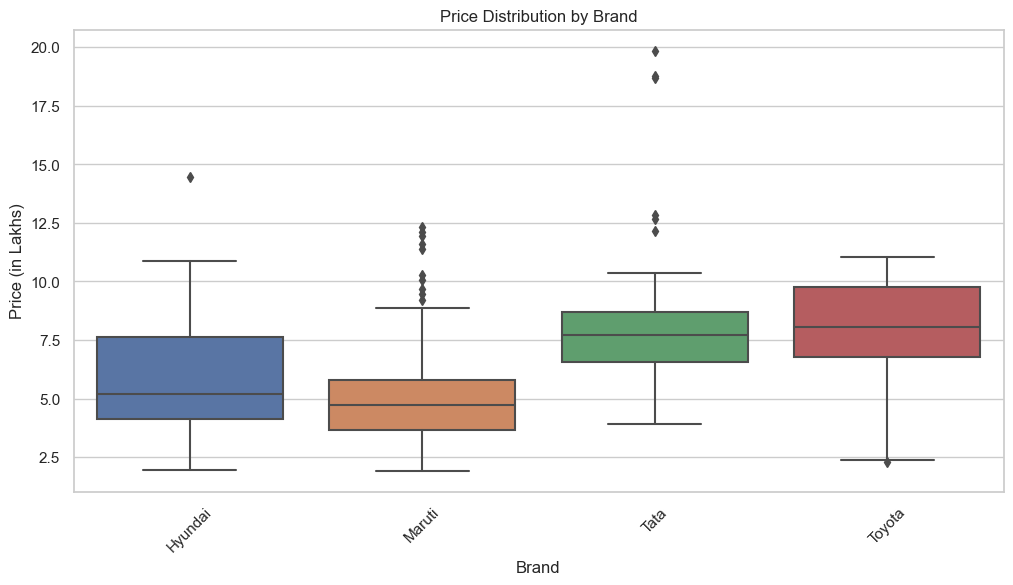

In [52]:
# 5. Box plot of prices for each brand

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Car Name'].str.split().str[0], y=df['Price (in Lakhs)'])
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

**Toyota shows the highest median price and largest price range.**
    
**Tata has a lower median but some high-priced outliers.**
    
**Hyundai and Maruti have similar distributions, with Hyundai slightly higher.**

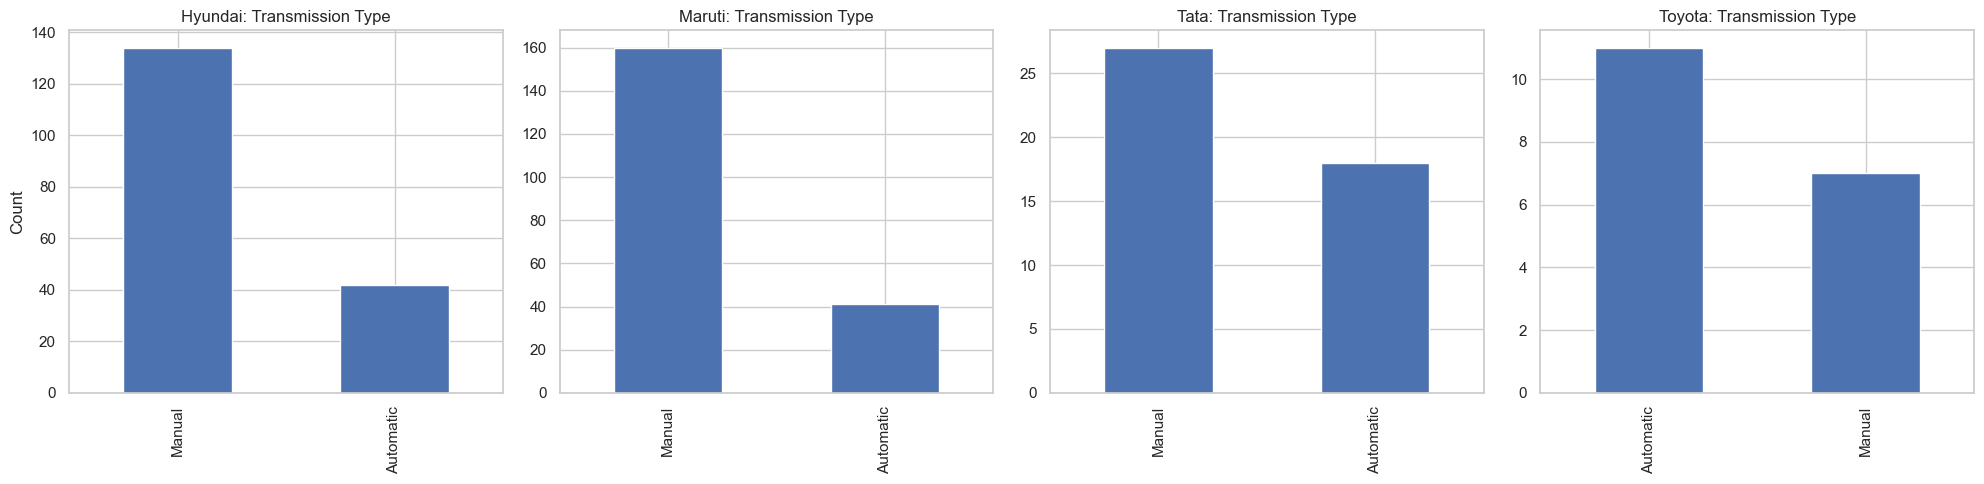

In [53]:
# 6. Transmission Type Distribution for each brand

plt.figure(figsize=(20, 5))

plt.subplot(141)
df[df['Car Name'].str.contains('Hyundai')]['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Hyundai: Transmission Type')
plt.ylabel('Count')

plt.subplot(142)
df[df['Car Name'].str.contains('Maruti')]['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Maruti: Transmission Type')

plt.subplot(143)
df[df['Car Name'].str.contains('Tata')]['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Tata: Transmission Type')

plt.subplot(144)
df[df['Car Name'].str.contains('Toyota')]['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Toyota: Transmission Type')

plt.tight_layout()
plt.show()

**All brands offer more manual transmission cars than automatic.**

**Toyota has the highest proportion of automatic cars.**

**Maruti has the lowest proportion of automatic cars, reflecting its focus on the budget segment.**

# Report for Used Car Buyers

**Price Considerations:**


> Most used cars in the market are priced between 2-8 lakhs, with the most common range being 4-6 lakhs.
Newer cars (2019-2022 models) are more abundant and generally pricier.
Diesel cars tend to be more expensive, followed by petrol, with CNG being the most affordable option.
Automatic transmission vehicles command a premium over manual ones.


**Mileage Insights:**


> The majority of used cars have been driven between 20,000 to 80,000 kilometers.
Higher mileage generally correlates with lower prices, but other factors like brand and condition also play a role.


**Fuel Type Availability:**


> Petrol cars dominate the market (about 80%), offering the widest choice.
Diesel cars make up about 15% of the market and tend to be pricier.
CNG cars are less common but offer an economical option for budget-conscious buyers.


**Transmission Options:**


> Manual transmission cars are more widely available (75% of the market) and generally cheaper.
Automatic cars, while pricier, are increasing in availability, especially in newer models.


**Brand-Specific Insights:**


> Toyota: Maintains higher prices even for older models. Offers mostly petrol cars with a good mix of automatic options.

> Tata: Shows rapid price increases in recent models. Offers more diesel options compared to other brands.

> Hyundai: Provides a balanced mix of fuel types and steady price progression over the years.

> Maruti: Offers the most affordable options with a focus on manual transmission and petrol engines.

# Challenges and Overcoming Them

**Dynamic Data Loading: BeautifulSoup alone was inadequate due to dynamic content loading on the website. This challenge was overcome by using Selenium to automate browser actions and fully load the data before extraction.**

**Data Cleaning: The extracted data required significant cleaning, especially in standardizing car names and separating the manufacture year from the car name for better readability. and coveting to correct data types**